## <font color=green> Malignant Comment Classification </font> 

### <font color=blue> Import packages and libraries </font> 

In [32]:
!pip install nltk
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

In [33]:
!pip install keras

In [34]:
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\IP
[nltk_data]     G3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### <font color=blue> Import the Train Dataset and About the dataset</font>

In [37]:
train=pd.read_csv("E:/FlipRobo/Malignant Comments Classifier/Malignant Comments Classifier Project/train.csv")

In [38]:
test=pd.read_csv("E:/FlipRobo/Malignant Comments Classifier/Malignant Comments Classifier Project/test.csv")

In [39]:
train.head(3)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [41]:
train.shape

(159571, 8)

<font color=purple> So we have 159571 records of comments in our train data set with 8 columns where 6 of them were categories of malignant comments that are malignant, highly_malignant, rude, threat, abuse, loathe. These all categories are int data type with binary classification and both id and comment_text columns are object data type.</font>

### <font color=blue> Checking nulls in both the datasets</font>

In [42]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [43]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

<font color=purple>There are no Null values.</font>

In [44]:
train.malignant.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

In [45]:
train.highly_malignant.value_counts(normalize=True)

0    0.990004
1    0.009996
Name: highly_malignant, dtype: float64

In [46]:
train.rude.value_counts(normalize=True)

0    0.947052
1    0.052948
Name: rude, dtype: float64

In [47]:
train.threat.value_counts(normalize=True)

0    0.997004
1    0.002996
Name: threat, dtype: float64

In [48]:
train.abuse.value_counts(normalize=True)

0    0.950636
1    0.049364
Name: abuse, dtype: float64

In [49]:
train.loathe.value_counts(normalize=True)

0    0.991195
1    0.008805
Name: loathe, dtype: float64

In [50]:
fig, plots = plt.subplots(2,3,figsize=(15,12))
plot1, plot2, plot3, plot4, plot5, plot6 = plots.flatten()
sns.countplot(train['malignant'], ax = plot1)
sns.countplot(train['highly_malignant'], ax = plot2)
sns.countplot(train['rude'], ax = plot3)
sns.countplot(train['threat'], ax = plot4)
sns.countplot(train['abuse'], ax = plot5)
sns.countplot(train['loathe'], ax = plot6)

C:\Users\IP G3\.conda\envs\tensorfloe-sessions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IP G3\.conda\envs\tensorfloe-sessions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IP G3\.conda\envs\tensorfloe-sessions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

<AxesSubplot:xlabel='loathe', ylabel='count'>

<font color=purple>Except "malignant", all the categories have imbalance dataset and in all the categories the no of records labelled as 0 are very higher than labelled 1 </font>

### <font color=blue> Countplot to show Count the categories </font> 

In [51]:
data_count=train.iloc[:,2:].sum()

In [52]:
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

C:\Users\IP G3\.conda\envs\tensorfloe-sessions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


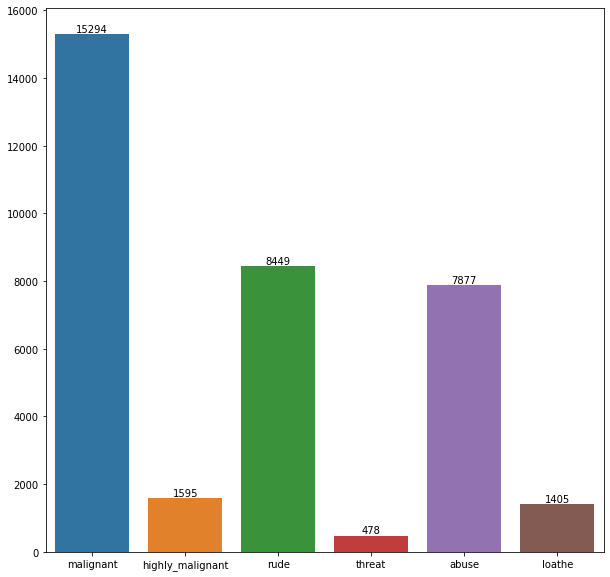

In [53]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data_count.index,data_count.values)
from matplotlib import pyplot as plt

rects=ax.patches
labels=data_count.values
for rect,label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,height+5, label, ha= 'center', va="bottom")
    
    
plt.show()

In [54]:
column_list = [f for f in train.columns if train.dtypes[f] != 'object']
df = pd.DataFrame(columns=column_list)
for col in column_list:
    df.loc[0,col] = train[train[col] == 1][col].sum()
df['Normal Comment'] = train.shape[0] - df.sum(axis=1)

### <font color=blue> Pie Plot to show chart </font>

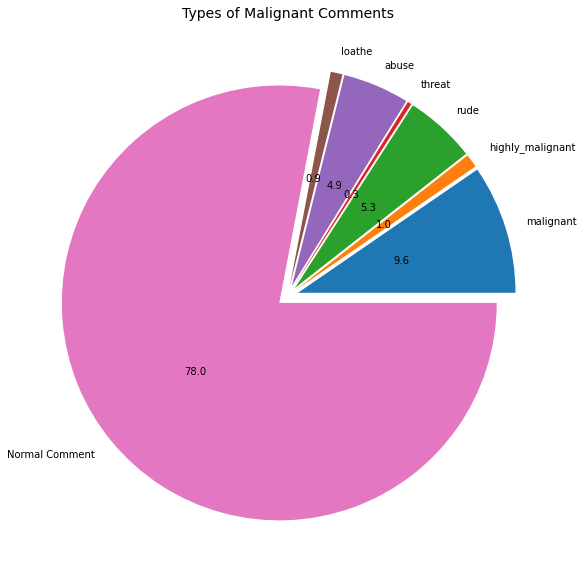

In [55]:
pie, ax = plt.subplots(figsize=[12,10])
labels = df.keys()
plt.pie(x=df.values[0], autopct="%.1f", explode=[0.05]*len(df.values[0]), labels=labels, pctdistance=0.5)
plt.title("Types of Malignant Comments", fontsize=14);
plt.savefig("MalignantCommentsChart.png")

### <font color=blue> Correlation Matrix </font>

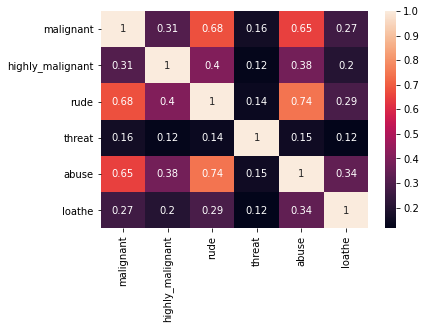

In [56]:
target_data = train.drop(['id', 'comment_text'], axis=1)
corrMatrix = target_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<font color=purple>
i)Correlation coefficient ranges from -1 to 1. Values always range between -1 imply strong negative relationship
between variables and +1 imply a strong positive relationship between variables. 
ii)Values at or close to zero imply weak or no linear relationship. 
iii)From the correlation matrix(graph), it can be concluded that some labels are highely correlated. Those varibles are mentioned below 
iv)Correlation coefficient for insult-obscene is 0.74, Correlation coefficient for toxic-obscene is 0.68 and Correlation coefficient for toxic-insult is 0.65.
</font>

### <font color=blue> Cleaning the text of coment_text section </font> 

In [57]:
import re
import string

In [58]:
alphanumeric=lambda x:re.sub('\w*\d\w*','',x)

In [59]:
punc_lower=lambda x:re.sub('[%s]'%re.escape(string.punctuation)," ", x.lower())

In [60]:
remove_underliner=lambda x:re.sub("\n"," ",x)

In [61]:
remove_non_ascii=lambda x:re.sub(r"[^\x00-\x7f]", r" ",x)

In [62]:
train["comment_text"]=train["comment_text"].map(alphanumeric).map(punc_lower).map(remove_underliner).map(remove_non_ascii)

In [63]:
test["comment_text"]=test["comment_text"].map(alphanumeric).map(punc_lower).map(remove_underliner).map(remove_non_ascii)

In [64]:
train.shape, test.shape

((159571, 8), (153164, 2))

### <font color=blue> Word Cloud of Each Label</font> 

In [65]:
!pip install wordcloud

In [66]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [67]:
def wordcloud(df, label):
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc=WordCloud(background_color="white",max_words=1000)
    wc.generate (" ".join(text))
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words mostly used in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=123))

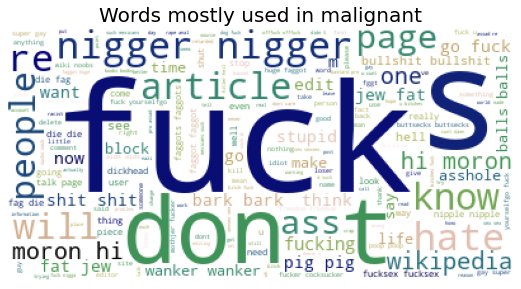

In [68]:
wordcloud(train,"malignant")

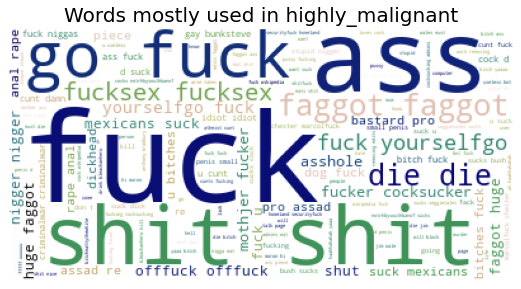

In [69]:
wordcloud(train,"highly_malignant")

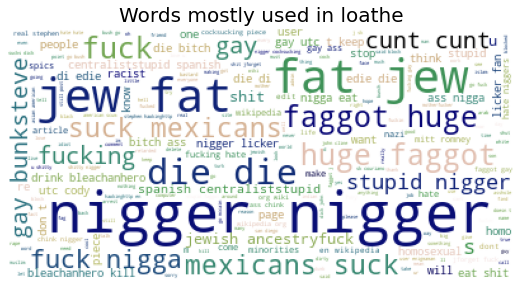

In [70]:
wordcloud(train,"loathe")

In [71]:
wordcloud(train,"rude")

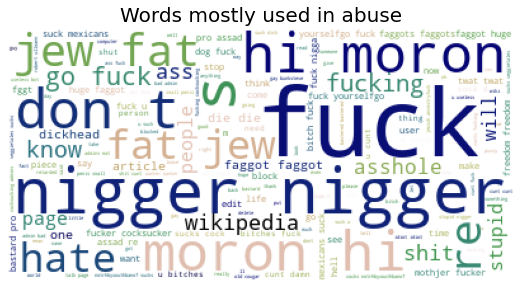

In [72]:
wordcloud(train,"abuse")

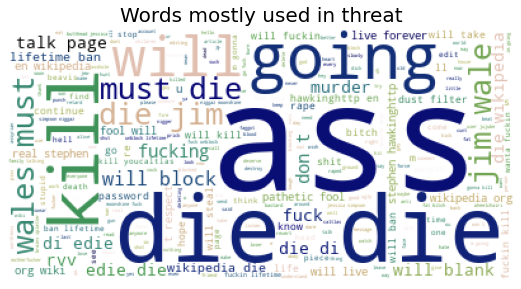

In [73]:
wordcloud(train,"threat")

### <font color=blue> Train and Test Split</font>

In [74]:
from sklearn.model_selection import train_test_split as split

In [75]:
train_set, val_set = split(train, test_size = 0.2, random_state=123)

### <font color=blue > Tokenization </font>

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [77]:
tokenizer = Tokenizer(num_words = 22000, oov_token='<oov>')
tokenizer.fit_on_texts(train)

In [84]:
train_final = tokenizer.texts_to_sequences(train["comment_text"])
test_final = tokenizer.texts_to_sequences(test["comment_text"])

In [85]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [86]:
train_padded =pad_sequences(train_final, maxlen=150)
test_padded =pad_sequences(test_final, maxlen=150)
print("Shape of training data",train_padded.shape)
print("Shape of testing data",test_padded.shape)

Shape of training data (159571, 150)
Shape of testing data (153164, 150)


### <font color=blue> Building a model </font>

In [87]:
model = Sequential()
model.add(Embedding(40000, 128))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         5120000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 5,202,822
Trainable params: 5,202,822
Non-trainable params: 0
_________________________________________________________________


In [97]:
train_labels=train[['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]

In [99]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
x_train, x_test, y_train, y_test = train_test_split(train_padded, train_labels, shuffle = True, random_state = 123)
model.fit(x_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
1197/1197 [==============================] - 281s 235ms/step - loss: 0.0463 - auc: 0.9833
Epoch 2/10
1197/1197 [==============================] - 281s 235ms/step - loss: 0.0424 - auc: 0.9865
Epoch 3/10
1197/1197 [==============================] - 280s 234ms/step - loss: 0.0388 - auc: 0.9889
Epoch 4/10
1197/1197 [==============================] - 281s 235ms/step - loss: 0.0352 - auc: 0.9910
Epoch 5/10
1197/1197 [==============================] - 282s 236ms/step - loss: 0.0318 - auc: 0.9926
Epoch 6/10
1197/1197 [==============================] - 285s 238ms/step - loss: 0.0289 - auc: 0.9940
Epoch 7/10
1197/1197 [==============================] - 286s 239ms/step - loss: 0.0265 - auc: 0.9949
Epoch 8/10
1197/1197 [==============================] - 287s 240ms/step - loss: 0.0244 - auc: 0.9954
Epoch 9/10
1197/1197 [==============================] - 289s 241ms/step - loss: 0.0226 - auc: 0.9960
Epoch 10/10
1197/1197 [==============================] - 289s 241ms/step - loss: 0.0206 - a

In [122]:
import joblib
joblib.dump(model,"Malignant_Comment_Classifier.obj")

TypeError: cannot pickle '_thread.RLock' object

In [100]:
predict = model.predict(test_padded)

In [104]:
labels = ['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
predictions = pd.DataFrame(predict, columns=labels)
predictions['ID']= test['id']
predictions.set_index("ID")

malignant  highly_malignant      rude    threat     abuse  \
ID                                                                            
00001cee341fdb12   0.989044      2.218444e-01  0.990021  0.189943  0.977524   
0000247867823ef7   0.000089      5.292686e-07  0.000016  0.000003  0.000007   
00013b17ad220c46   0.001958      3.665235e-05  0.002553  0.000047  0.000618   
00017563c3f7919a   0.000155      1.038274e-06  0.000042  0.000007  0.000018   
00017695ad8997eb   0.000243      1.252409e-06  0.000051  0.000005  0.000019   
...                     ...               ...       ...       ...       ...   
fffcd0960ee309b5   0.305840      8.713366e-05  0.035533  0.000025  0.006402   
fffd7a9a6eb32c16   0.000089      4.067210e-07  0.000013  0.000002  0.000006   
fffda9e8d6fafa9e   0.000080      6.511270e-07  0.000043  0.000003  0.000012   
fffe8f1340a79fc2   0.000097      4.930259e-07  0.000020  0.000002  0.000008   
ffffce3fb183ee80   0.970277      2.226302e-02  0.921819  0.000647  0.668898   

                    loathe  
ID                          
00001cee341fdb12  0.508928  
0000247867823ef7  0.000005  
00013b17ad220c46  0.000131  
00017563c3f7919a  0.000010  
00017695ad8997eb  0.000008  
...                    ...  
fffcd0960ee309b5  0.000089  
fffd7a9a6eb32c16  0.000004  
fffda9e8d6fafa9e  0.000006  
fffe8f1340a79fc2  0.000004  
ffffce3fb183ee80  0.003469  

[153164 rows x 6 columns]

In [106]:
predictions.to_csv("Predicted_Probablities_of_test_data.csv")